In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
cars_data = pd.read_csv('Cardetails.csv')

In [3]:
cars_data.drop(columns=['torque'], inplace=True)

In [4]:
cars_data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [5]:
cars_data.duplicated().sum()

1202

In [6]:
cars_data.drop_duplicates(inplace=True)

In [7]:
cars_data.dropna(inplace=True)

In [8]:
cars_data.shape

(6718, 12)

In [9]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


In [10]:
def brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [11]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [12]:
cars_data['name'] = cars_data['name'].apply(brand_name)

In [13]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [15]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

<ipython-input-15-87ac83877902>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)
<ipython-input-15-87ac83877902>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data['transmission'].replace(['Manual', 'Automatic'],[

In [16]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   int64  
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 682.3 KB


In [17]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
8122,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
8123,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
8124,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [18]:
cars_data.reset_index(inplace=True)

In [22]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [20]:
cars_data.drop(columns=['index'], inplace=True)

In [21]:
cars_data.drop(columns=['level_0'], inplace=True)

KeyError: "['level_0'] not found in axis"

In [23]:
input_data = cars_data.drop(columns=['selling_price'])
output_data =cars_data['selling_price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2,random_state=2)

In [25]:
decision_tree = DecisionTreeRegressor(random_state=2)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2)

In [26]:
y_pred = decision_tree.predict(X_test)

In [27]:
r2 = r2_score(y_test, y_pred)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 41594735254.432106
Mean Absolute Error (MAE): 102770.86470734126


In [28]:
print("R² Score:", r2)

R² Score: 0.870208783928259


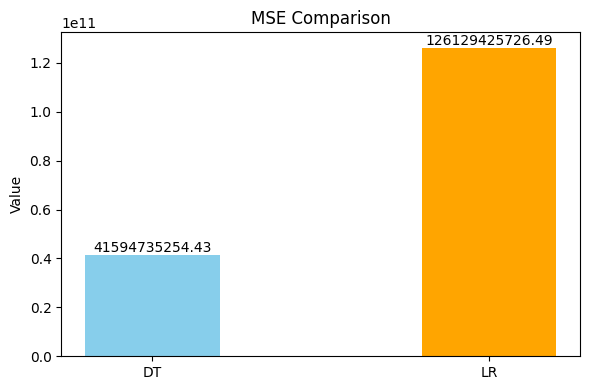

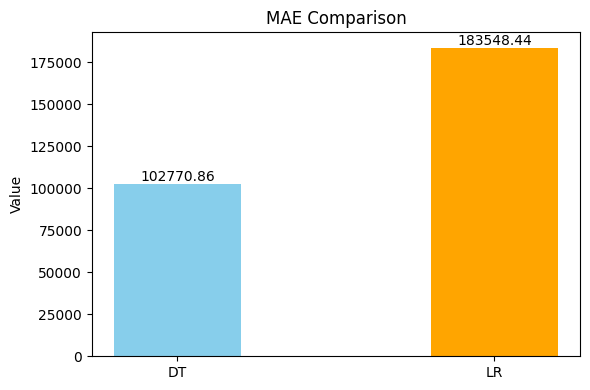

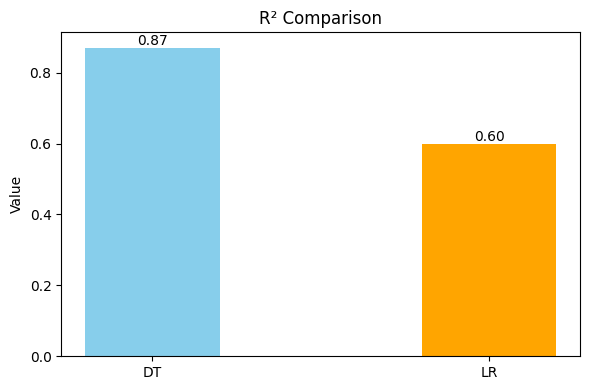

In [33]:
import matplotlib.pyplot as plt

# Data to display
metrics = ['MSE', 'MAE', 'R²']
model_1_values = [41594735254.43, 102770.86, 0.87]  # Model 1 metrics
model_2_values = [126129425726.49, 183548.44, 0.60]  # Model 2 metrics

# Create individual bar graphs for each metric
for i, metric in enumerate(metrics):
    # Data for the current metric
    values = [model_1_values[i], model_2_values[i]]
    models = ['DT', 'LR']

    # Plot
    plt.figure(figsize=(6, 4))
    plt.bar(models, values, color=['skyblue', 'orange'], width=0.4)
    plt.title(f'{metric} Comparison')
    plt.ylabel('Value')
    for j, value in enumerate(values):
        plt.text(j, value, f'{value:.2f}', ha='center', va='bottom')

    # Show plot
    plt.tight_layout()
    plt.show()


In [1]:
import pickle as pk
pk.dump(decision_tree,open('model.pkl','wb'))

NameError: name 'decision_tree' is not defined